**Data Cleaning New Customer List**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading customer demographic data  sheet from raw excel file
new_cust = pd.read_excel('Raw_data.xlsx',sheet_name="NewCustomerList")


In [6]:
#check record for data set
new_cust.head(5)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.54,0.6750,0.84375,0.717187,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.90,0.9000,1.12500,0.956250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.88,0.8800,0.88000,0.880000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.67,0.8375,0.83750,0.837500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.70,0.7000,0.87500,0.875000,4,4,1.703125


In [7]:
#Data Types for new  Customer  data

new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

Based on the above information, we can observe that the data types of most columns are appropriate; however, the DOB column is currently in an object format and needs to be converted. Additionally, some columns contain missing values, and column like unnamed :16, unnamed: 17, unnnamed : 18, unnamed:19 , unnamed : 20 appears to be irrelevant to our analysis 

In [8]:
# no of rows and columns in the data set :
print("Total records (rows) in the dataset : {}".format(new_cust.shape[0]))
print("Total columns (features) in the dataset : {}".format(new_cust.shape[1]))

Total records (rows) in the dataset : 1000
Total columns (features) in the dataset : 23


In [10]:
#Convert data types
new_cust['DOB'] = pd.to_datetime(new_cust['DOB'], errors='coerce')

**Numeric and Non Numeric columns**

In [11]:
# select numeric columns
df_numeric = new_cust.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print("The numeric columns are :")
print(numeric_cols)


# select non-numeric columns
df_non_numeric = new_cust.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print("The non-numeric columns are :")
print(non_numeric_cols)

The numeric columns are :
['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']
The non-numeric columns are :
['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


In [12]:
# Drop Irrelevant columns 

new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'], axis=1 , inplace=True)

In [14]:
## Missing values

new_cust.isna().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

columns like last_name,DOB,Job_title,and job_industry_category have missing values


In [16]:
round(new_cust.isnull().mean()*100,2)

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [19]:
# Last name missing value imputation 

new_cust[new_cust['last_name'].isnull()]['first_name'].isnull().sum()

0

Since each individual has a first name with no missing values, it's easy to identify them. Therefore, it's acceptable to fill missing values in the last name column with "NA".

In [20]:
# replacing none for lastname

new_cust['last_name'].fillna('None',axis=0, inplace=True)

print(new_cust['last_name'].isnull().sum())   


0


There is no missing value after imputation

**Date of Birth**

In [21]:
round(new_cust["DOB"].isnull().mean()*100,2)

1.7

Since only 2% of the dataset has missing values in the DOB column, it's reasonable to remove those rows where the date of birth is null to maintain data quality without significantly impacting the dataset size.

In [22]:
#remove null values form Date of birth columns
dob_index_drop = new_cust[new_cust['DOB'].isnull()].index
dob_index_drop

new_cust.drop(index=dob_index_drop, inplace=True, axis=0)  

In [23]:
new_cust['DOB'].isnull().sum() 

0

There is no missing values after the rows removed

**Creating Age Column for checking further descripency in data**

In [24]:
# Function to find the age of customers as of today.

def age(born):
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

new_cust['Age'] = new_cust['DOB'].apply(age)

In [25]:
#Descriptive statistics for age
new_cust["Age"].describe()

count    983.000000
mean      53.549339
std       17.056912
min       23.000000
25%       41.500000
50%       53.000000
75%       67.000000
max       86.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

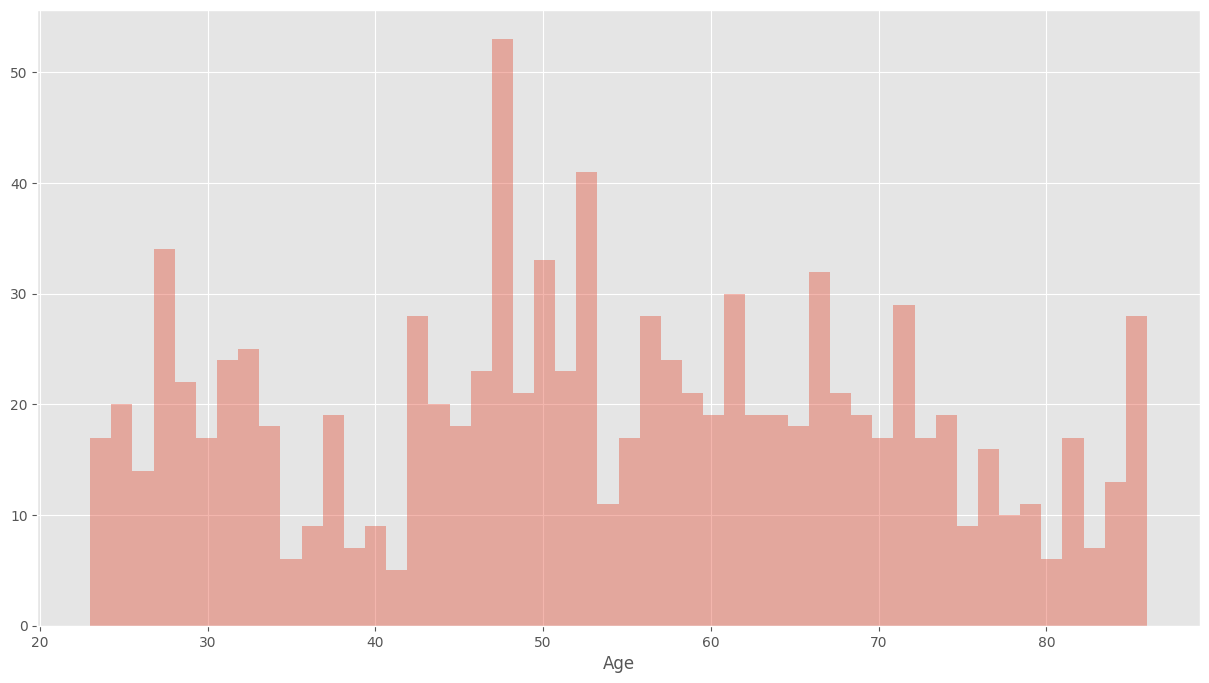

In [26]:
# Viz to find out the Age Distribution
plt.figure(figsize=(15,8))
sns.distplot(new_cust['Age'], kde=False, bins=50)

Looks like age columns dosen't have any descripency in the data

**Job Title**

In [27]:
round(new_cust["job_title"].isnull().mean()*100,2)

10.68

Since percentage of missing values for Job Title is 11%. We will replace null values with Missing.

In [28]:
new_cust["job_title"].fillna('Missing',inplace=True,axis=0)

In [29]:
new_cust["job_title"].isna().sum()

0

Currently there is no missing values for job_title column


**Job Industry Category**

In [30]:
round(new_cust["job_industry_category"].isnull().mean()*100,2)

16.79

Since percentage of missing values for Job_industry_category is 17%. We will replace null values with Missing.


In [31]:
new_cust["job_industry_category"].fillna("Missing",inplace=True,axis=0)

In [32]:
new_cust["job_industry_category"].isna().sum()

0

Currently there is no missing values in job industry category

In [33]:
new_cust.isna().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
dtype: int64

There is no missing values in the data set 

In [34]:
print("Total records after removing Missing Values: {}".format(new_cust.shape[0]))

Total records after removing Missing Values: 983


**Inconsistency Check in Data**

We will check whether there is inconsistent data / typo error data is present in the categorical columns.
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car

In [35]:
#Gender

new_cust["gender"].value_counts()

gender
Female    513
Male      470
Name: count, dtype: int64

There is no inconsistent data in gender columns

In [36]:
#Wealth segment 

new_cust["wealth_segment"].value_counts()

wealth_segment
Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: count, dtype: int64

There is no inconsistent data in wealth segment columns


In [37]:
# deceased_indicator

new_cust['deceased_indicator'].value_counts()

deceased_indicator
N    983
Name: count, dtype: int64

There is no inconsistent data in  deceased_indicator columns


In [39]:
# Owns a Car

new_cust["owns_car"].value_counts()

owns_car
No     497
Yes    486
Name: count, dtype: int64

There is no inconsistent data in owns_car columns

In [40]:
#state
new_cust["state"].value_counts()
 

state
NSW    499
VIC    258
QLD    226
Name: count, dtype: int64

There is no inconsistent data in state columns


In [41]:
#country
new_cust["country"].value_counts()

country
Australia    983
Name: count, dtype: int64

There is no inconsistent data in country columns

In [42]:
#postcode

new_cust[['postcode', 'state']].drop_duplicates().sort_values('state')

,postcode,state
164,2073,NSW
202,2300,NSW
616,2049,NSW
204,2429,NSW
615,2070,NSW
...,...,...
234,3429,VIC
589,3037,VIC
604,3129,VIC
245,3134,VIC


There is no inconsistent data in postcode columns


In [43]:
#Address

new_cust[['address', 'postcode','state','country']].sort_values('address')

,address,postcode,state,country
721,0 Bay Drive,2750,NSW,Australia
138,0 Dexter Parkway,2380,NSW,Australia
624,0 Emmet Trail,4128,QLD,Australia
300,0 Esker Avenue,4019,QLD,Australia
685,0 Express Lane,2142,NSW,Australia
...,...,...,...,...
308,99 Westend Court,2287,NSW,Australia
336,990 Hoffman Avenue,3029,VIC,Australia
796,99376 Namekagon Street,3101,VIC,Australia
583,9940 Manley Drive,2574,NSW,Australia


There is no inconsistent data in postcode columns

In [44]:
#Tenure

new_cust["tenure"].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

<Axes: xlabel='tenure', ylabel='Density'>

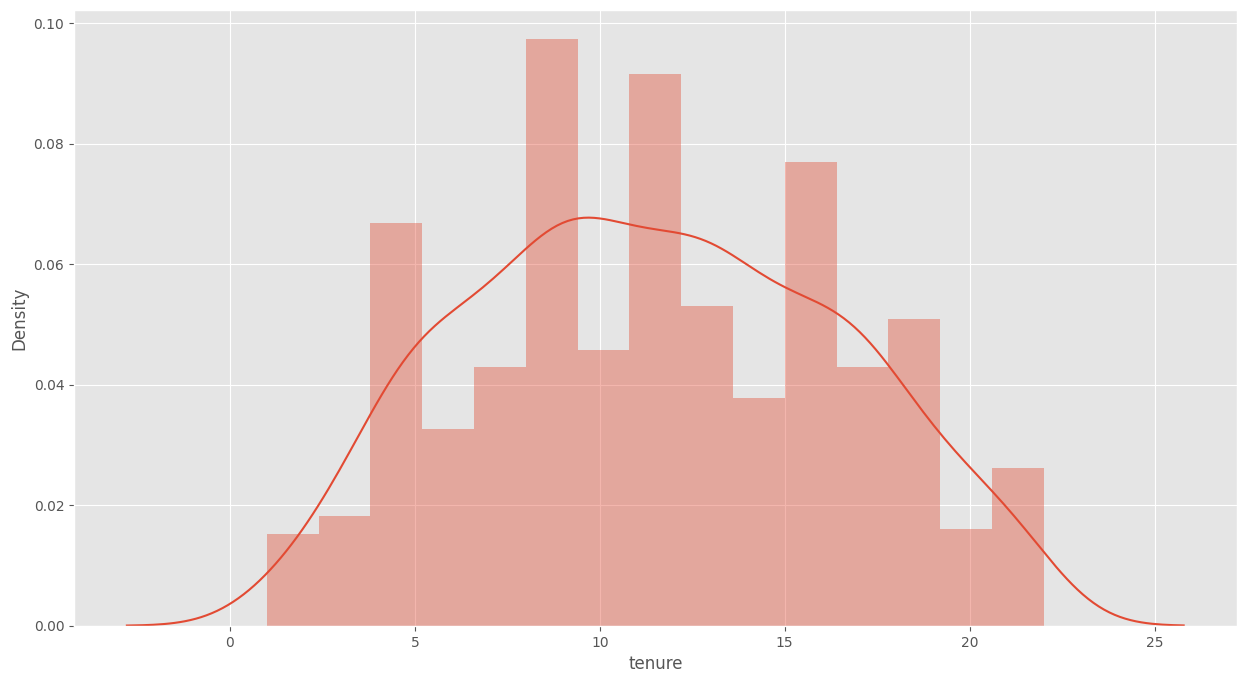

In [45]:
# Distributon of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_cust['tenure'])

The distirbution of tenure looks normal distribution and there is no outliers 

**Check for duplicate values**

We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.


In [46]:
#Return boolean series of duplicate values 
duplicates=new_cust.duplicated()


#display duplicates rows
new_cust[duplicates]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age


There is no duplicate records in this data set

**Exporting the Cleaned New Customer Data Set to csv**

Currently the  New Customer  dataset is clean. Hence we can export the data to a csv to continue our data analysis of Customer Segments by joining it to other tables.


In [47]:
new_cust.to_csv('NewCustomerList_Cleaned.csv', index=False)